# 02 特征工程与数据分析

本 Notebook 中，我们将对整理好的文本情感分类数据集进行特征工程处理，并进行数据统计分析，得到数据的基本分布情况。

## 2.1 加载数据

首先从清洗好的数据集中加载数据，并将其转换为 `DataFrame` 对象，以便后续处理。

In [2]:
import pandas as pd

# 读取数据
df = pd.read_csv('data/weibo_cleaned.csv', encoding='utf-8-sig')
print(f"原始数据: {len(df)} 行，{len(df.columns)} 列")

df.sample(5)

原始数据: 358584 行，2 列


,text,sentiment_type
73458,原来大食蚁兽是 大 蚂蚁 吃 用片假名写的本来还以为是什么学名（,中立
142685,最后放一些p过的漂亮照,积极
65967,一些可可爱爱 日常,积极
68825,酱牛肉，洗窗帘，擦瓷砖，为了过年而忙碌着，还是没找的过年的感觉,中立
271084,我喜欢畅快呼吸的感受,积极


## 2.2 特征工程

本项目的特征工程并不复杂。我们主要关注微博文本内容的情感分类任务，因此主要特征即为微博文本本身。

对于情感标签，如前所述，分为“积极”“中立”“消极”三类。为便于机器学习模型处理，将它们分别映射为数值标签 1, 0 和 -1，称为情感极性。

此外，我们还可以考虑一些简单的文本特征，如文本长度。

In [3]:
# 计算情感极性 (sentiment_polarity)
df['sentiment_polarity'] = df['sentiment_type'].map({'积极': 1, '消极': -1, '中立': 0}).fillna(0)

# 计算文本长度 (text_length)
df['text_length'] = df['text'].str.len()

print(f"特征工程完成! 新增了 2 个特征，现在共 {len(df.columns)} 列")

特征工程完成! 新增了 2 个特征，现在共 4 列


In [4]:
# 保存特征工程后的数据
output_path = 'data/weibo_features.csv'
df.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f'已保存到 {output_path}, 行数: {len(df)}, 列数: {len(df.columns)}')

# 显示数据预览和基本信息
print("\n数据基本信息:")
print(df.info())

已保存到 data/weibo_features.csv, 行数: 358584, 列数: 4

数据基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358584 entries, 0 to 358583
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   text                358584 non-null  object
 1   sentiment_type      358584 non-null  object
 2   sentiment_polarity  358584 non-null  int64 
 3   text_length         358584 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 10.9+ MB
None


## 2.3 数据分析
接下来对数据集进行简单的统计分析，了解数据的基本情况和分布特征。

### 2.3.1 数据集大小

In [5]:
print(f"数据集大小: {len(df)} 条微博")
print(f"特征数量: {len(df.columns)} 个")

数据集大小: 358584 条微博
特征数量: 4 个


可以看到，该数据集包含 358,584 条微博，这是一个相当大规模的数据集，为情感分类任务提供了充足的训练样本。

### 2.3.2 文本长度分布


微博长度分布:
count    358584.000000
mean         18.755115
std          11.138932
min           4.000000
25%          10.000000
50%          16.000000
75%          26.000000
max          49.000000
Name: text_length, dtype: float64


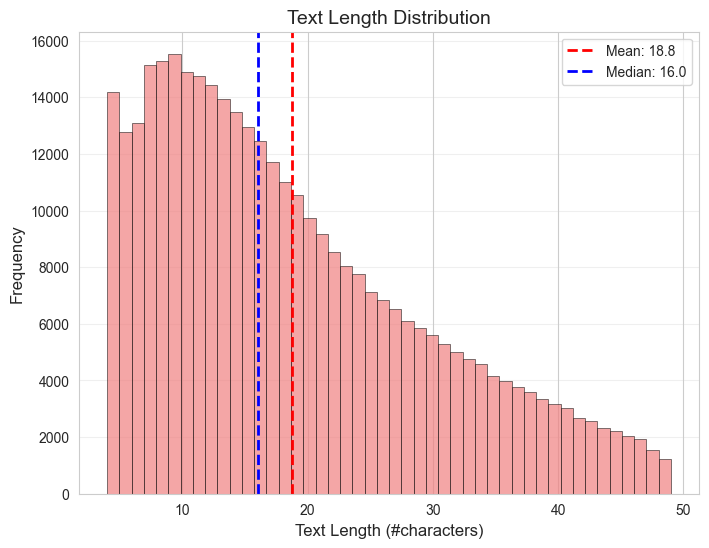

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文显示和图形样式
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

print("\n微博长度分布:")
print(df['text_length'].describe())


# 绘制直方图
plt.figure(figsize=(8, 6))
plt.hist(df['text_length'], bins=46, color='lightcoral', alpha=0.7, edgecolor='black', linewidth=0.5)
plt.title('Text Length Distribution', fontsize=14)
plt.xlabel('Text Length (#characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# 添加统计信息
mean_length = df['text_length'].mean()
median_length = df['text_length'].median()
plt.axvline(mean_length, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_length:.1f}')
plt.axvline(median_length, color='blue', linestyle='--', linewidth=2, label=f'Median: {median_length:.1f}')
plt.legend();

可以看到，大部分微博文本集中在较短长度（5~20字）范围内，随着文本长度增加，频次呈指数式递减，呈现明显的右偏分布，这也可以从统计数据中得出（均值$18.8$ $>$ 中位数$16.0$）。这种短文本为主的分布特征是社交媒体文本的典型特征。

### 2.3.3 情感类型分布

sentiment_type
积极    167778
消极    124334
中立     66472
Name: count, dtype: int64


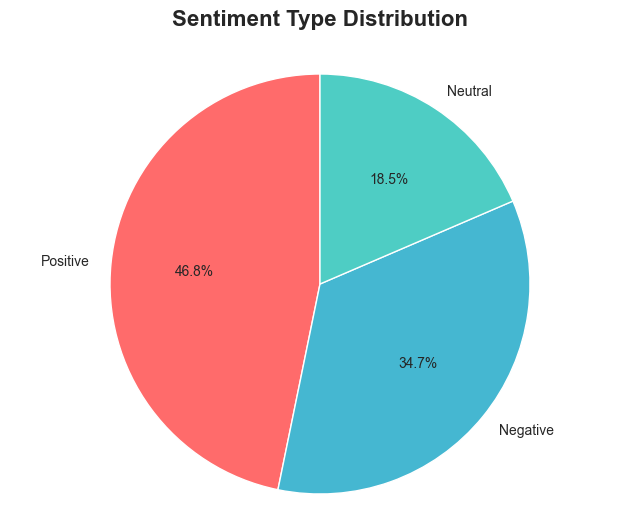

In [ ]:
# 统计情感类型分布
type_counts = df['sentiment_type'].value_counts()
print(type_counts)

# 绘制饼状图
plt.figure(figsize=(8, 6))

labels = ["Positive", "Negative", "Neutral"]
colors = ['#FF6B6B', '#45B7D1', '#4ECDC4']

# explode_vals = (0.05, 0.05, 0.05)  # 根据实际情感类别数量调整
plt.pie(type_counts.values, labels=labels, autopct='%1.1f%%', 
        colors=colors, startangle=90)

plt.title('Sentiment Type Distribution', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.show()


In [3]:
import numpy as np

arr = np.array([167778, 124334, 66472*1.5])
arr.std() / arr.mean()

np.float64(0.2154652899812368)

从统计数据与饼状图可以明显看出，数据集存在类别不平衡的问题，积极情感样本的数量最多，消极情感次之，中立情感样本最少。为了衡量数据集的类别不平衡程度，我们计算以下两个指标：

#### (1) 最大类 / 最小类 比率
最大类 / 最小类 比率（Imbalance Ratio, IR）定义为：
$$
IR = \frac{\max{(n_i)}}{\min{(n_i)}}
$$
式中的 $n_i$ 表示第 $i$ 类的样本数量，这里即标签为“积极”“消极”或“中立”的样本数量。$IR$ 越大，表示类别不平衡程度越高。

一般来说：
- $IR \leq 1.5$ → 非常平衡

- $1.5 < IR \leq 3$ → 轻度不平衡

- $IR > 3$ → 明显不平衡

- $IR > 10$ → 高度不平衡，需要采样或加权

In [10]:
ir = type_counts.max() / type_counts.min()

print(f"类别不平衡比率 (Imbalance Ratio, IR): {ir:.2f}")

类别不平衡比率 (Imbalance Ratio, IR): 2.52


从 IR 可以看出数据集存在轻度不平衡现象。

#### (2) 变异系数
变异系数（Coefficient of Variation, CV）定义为：
$$
CV = \frac{\sigma}{\mu}
$$
式中的 $\sigma$ 表示标准差，$\mu$ 表示均值。$CV$ 越大，表示类别不平衡程度越高。

一般来说：
- $CV \leq 0.1$ → 非常平衡

- $0.1 < CV \leq 0.3$ → 可接受

- $CV > 0.3$ → 明显不平衡


In [11]:
cv = type_counts.std() / type_counts.mean()

print(f"变异系数 (Coefficient of Variation, CV): {cv:.2f}")

变异系数 (Coefficient of Variation, CV): 0.43


故从 CV 可以看出数据集存在明显不平衡现象。

通过以上的分析可以看出，数据集中积极情感样本数量最多、中性情感样本数量最少，这种不平衡性可能会使模型偏向预测“积极”，并导致中立情感的召回率较低。

为了缓解数据不平衡性及其对模型造成的影响，我们将在下一个 Notebook 中针对中性情感样本进行数据增强处理，并在模型训练阶段采用类别加权策略。